# Identification of Drug Target Proteins Using Stacked Auto Encoders and Various Machine Learning Models

## Introduction:

In [6]:
# import necessary dependancies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
df = pd.read_excel('pone.0176486.s001.xlsx')
df.head()

,Unnamed: 0,Protein,Ala,Asx,Cys,Asp,Glu,Phe,Gly,His,...,Hydrophobicity,LowComplexityRegions,Ser.1,Thr.1,Tyr.1,Ogly_S,Ogly_T,Ngly,SignalP,Trans_Helices
0,0,SOAT1_HUMAN,6.182,0,1.636,3.273,5.091,10.545,3.818,2.182,...,104.7,0,1,2,0,0,0,0,0.000,8
1,0,GLRX2_HUMAN,11.585,0,2.439,3.659,4.878,3.659,7.317,2.439,...,-34.6,1,0,0,0,0,1,0,0.975,0
2,0,CDO1_HUMAN,5.500,0,2.000,5.000,8.000,4.500,5.500,5.500,...,-120.7,0,0,0,0,0,0,0,0.001,0
3,0,LGSN_HUMAN,6.680,0,2.554,5.108,7.466,5.501,5.108,2.161,...,-173.3,0,2,1,0,0,0,0,0.000,0
4,0,NADC_HUMAN,16.835,0,2.020,4.040,5.387,3.704,9.091,2.357,...,96.8,2,0,0,0,0,0,0,0.713,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5893 entries, 0 to 5892
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5893 non-null   int64  
 1   Protein               5893 non-null   object 
 2   Ala                   5893 non-null   float64
 3   Asx                   5893 non-null   int64  
 4   Cys                   5893 non-null   float64
 5   Asp                   5893 non-null   float64
 6   Glu                   5893 non-null   float64
 7   Phe                   5893 non-null   float64
 8   Gly                   5893 non-null   float64
 9   His                   5893 non-null   float64
 10  Ile                   5893 non-null   float64
 11  Lys                   5893 non-null   float64
 12  Leu                   5893 non-null   float64
 13  Met                   5893 non-null   float64
 14  Asn                   5893 non-null   float64
 15  Pro                  

In [9]:
# inspect missing values
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['Count', '%']
missing.sort_values(by='Count', ascending=False)

,Count,%
Unnamed: 0,0,0.0
Protein,0,0.0
Glx,0,0.0
Tiny,0,0.0
Small,0,0.0
Aliphatic,0,0.0
Aromatic,0,0.0
Non-polar,0,0.0
Polar,0,0.0
Charged,0,0.0


In [10]:
df.columns

Index(['Unnamed: 0', 'Protein', 'Ala', 'Asx', 'Cys', 'Asp', 'Glu', 'Phe',
       'Gly', 'His', 'Ile', 'Lys', 'Leu', 'Met', 'Asn', 'Pro', 'Gln', 'Arg',
       'Ser', 'Thr', 'Val', 'Trp', 'Xaa', 'Tyr', 'Glx', 'Tiny', 'Small',
       'Aliphatic', 'Aromatic', 'Non-polar', 'Polar', 'Charged', 'Basic',
       'Acidic', 'Hydrophobicity      ', 'LowComplexityRegions', 'Ser.1',
       'Thr.1', 'Tyr.1', 'Ogly_S', 'Ogly_T', 'Ngly', 'SignalP',
       'Trans_Helices'],
      dtype='object')

In [11]:
# rename columns, DTP is the label of if the drug is considered a known drugable target protein

df.rename( columns={'Unnamed: 0':'DTP', 'Hydrophobicity      ': 'Hydrophobicity'}, inplace=True )


In [12]:
df.head()

,DTP,Protein,Ala,Asx,Cys,Asp,Glu,Phe,Gly,His,...,Hydrophobicity,LowComplexityRegions,Ser.1,Thr.1,Tyr.1,Ogly_S,Ogly_T,Ngly,SignalP,Trans_Helices
0,0,SOAT1_HUMAN,6.182,0,1.636,3.273,5.091,10.545,3.818,2.182,...,104.7,0,1,2,0,0,0,0,0.000,8
1,0,GLRX2_HUMAN,11.585,0,2.439,3.659,4.878,3.659,7.317,2.439,...,-34.6,1,0,0,0,0,1,0,0.975,0
2,0,CDO1_HUMAN,5.500,0,2.000,5.000,8.000,4.500,5.500,5.500,...,-120.7,0,0,0,0,0,0,0,0.001,0
3,0,LGSN_HUMAN,6.680,0,2.554,5.108,7.466,5.501,5.108,2.161,...,-173.3,0,2,1,0,0,0,0,0.000,0
4,0,NADC_HUMAN,16.835,0,2.020,4.040,5.387,3.704,9.091,2.357,...,96.8,2,0,0,0,0,0,0,0.713,0


In [13]:
used_data = df.drop(['Xaa','Glx', 'Asx'], axis = 1)

In [14]:
used_data.head()

,DTP,Protein,Ala,Cys,Asp,Glu,Phe,Gly,His,Ile,...,Hydrophobicity,LowComplexityRegions,Ser.1,Thr.1,Tyr.1,Ogly_S,Ogly_T,Ngly,SignalP,Trans_Helices
0,0,SOAT1_HUMAN,6.182,1.636,3.273,5.091,10.545,3.818,2.182,5.273,...,104.7,0,1,2,0,0,0,0,0.000,8
1,0,GLRX2_HUMAN,11.585,2.439,3.659,4.878,3.659,7.317,2.439,3.659,...,-34.6,1,0,0,0,0,1,0,0.975,0
2,0,CDO1_HUMAN,5.500,2.000,5.000,8.000,4.500,5.500,5.500,4.500,...,-120.7,0,0,0,0,0,0,0,0.001,0
3,0,LGSN_HUMAN,6.680,2.554,5.108,7.466,5.501,5.108,2.161,5.108,...,-173.3,0,2,1,0,0,0,0,0.000,0
4,0,NADC_HUMAN,16.835,2.020,4.040,5.387,3.704,9.091,2.357,2.020,...,96.8,2,0,0,0,0,0,0,0.713,0


In [15]:
dtp = used_data.iloc[0:517]
print(dtp)


     DTP      Protein     Ala    Cys    Asp    Glu     Phe    Gly    His  \
0      0  SOAT1_HUMAN   6.182  1.636  3.273  5.091  10.545  3.818  2.182   
1      0  GLRX2_HUMAN  11.585  2.439  3.659  4.878   3.659  7.317  2.439   
2      0   CDO1_HUMAN   5.500  2.000  5.000  8.000   4.500  5.500  5.500   
3      0   LGSN_HUMAN   6.680  2.554  5.108  7.466   5.501  5.108  2.161   
4      0   NADC_HUMAN  16.835  2.020  4.040  5.387   3.704  9.091  2.357   
..   ...          ...     ...    ...    ...    ...     ...    ...    ...   
512    0  PHOP1_HUMAN   9.738  2.996  5.993  5.243   5.993  7.865  3.371   
513    0   PROD_HUMAN  10.833  1.667  4.167  8.000   4.000  6.000  2.500   
514    0   OAZ1_HUMAN   6.140  2.632  4.825  7.895   4.825  7.018  3.947   
515    0    NEP_HUMAN   7.067  1.600  5.733  7.333   3.733  5.600  1.200   
516    0   IFNG_HUMAN   5.422  1.807  6.024  5.422   6.627  4.217  1.205   

       Ile  ...  Hydrophobicity  LowComplexityRegions  Ser.1  Thr.1  Tyr.1  \
0    5.27

In [16]:
ndtp = used_data.iloc[517:]
print(ndtp)

      DTP      Protein     Ala    Cys    Asp     Glu    Phe     Gly    His  \
517     1  SPRY3_HUMAN   4.072  2.036  7.692   7.919  4.072  11.086  3.620   
518     1   SSPN_HUMAN   7.407  6.584  3.292   3.704  5.350   7.407  1.235   
519     1  ZFPL1_HUMAN  10.000  4.194  5.806   3.871  2.581   5.806  2.903   
520     1  PTGES_HUMAN  11.184  2.632  2.632   2.632  5.921   4.605  3.947   
521     1   KPRB_HUMAN   7.317  1.897  5.149   6.775  2.981   5.149  2.168   
...   ...          ...     ...    ...    ...     ...    ...     ...    ...   
5888    1  K1143_HUMAN   5.844  0.000  8.442  11.688  1.948   3.896  1.299   
5889    1  CECR5_HUMAN   9.693  1.891  3.783   5.437  3.310   9.456  2.600   
5890    1  ENOF1_HUMAN   7.449  2.483  7.223   6.095  2.709   7.223  2.935   
5891    1  RNBP6_HUMAN   8.054  2.443  6.697   7.692  3.529   3.982  2.262   
5892    1  K1841_HUMAN   4.457  3.760  6.128   8.217  3.203   4.735  2.228   

         Ile  ...  Hydrophobicity  LowComplexityRegions  Ser.1 

In [17]:
used_data.columns

Index(['DTP', 'Protein', 'Ala', 'Cys', 'Asp', 'Glu', 'Phe', 'Gly', 'His',
       'Ile', 'Lys', 'Leu', 'Met', 'Asn', 'Pro', 'Gln', 'Arg', 'Ser', 'Thr',
       'Val', 'Trp', 'Tyr', 'Tiny', 'Small', 'Aliphatic', 'Aromatic',
       'Non-polar', 'Polar', 'Charged', 'Basic', 'Acidic', 'Hydrophobicity',
       'LowComplexityRegions', 'Ser.1', 'Thr.1', 'Tyr.1', 'Ogly_S', 'Ogly_T',
       'Ngly', 'SignalP', 'Trans_Helices'],
      dtype='object')

In [18]:
used_data.shape

(5893, 41)

In [19]:
used_col = used_data.iloc[:,2:42]
used_col.shape

(5893, 39)

In [20]:
used_col.columns

Index(['Ala', 'Cys', 'Asp', 'Glu', 'Phe', 'Gly', 'His', 'Ile', 'Lys', 'Leu',
       'Met', 'Asn', 'Pro', 'Gln', 'Arg', 'Ser', 'Thr', 'Val', 'Trp', 'Tyr',
       'Tiny', 'Small', 'Aliphatic', 'Aromatic', 'Non-polar', 'Polar',
       'Charged', 'Basic', 'Acidic', 'Hydrophobicity', 'LowComplexityRegions',
       'Ser.1', 'Thr.1', 'Tyr.1', 'Ogly_S', 'Ogly_T', 'Ngly', 'SignalP',
       'Trans_Helices'],
      dtype='object')

In [21]:
Dtp = used_col.iloc[0:517]
Ndtp = used_col.iloc[517:]

from scipy.stats import ks_2samp
ks_2samp(Dtp['Ala'], Ndtp['Ala'])

KstestResult(statistic=0.11697774189463019, pvalue=4.420542004446304e-06)

In [22]:
use_array = used_col.columns.to_numpy()
print(use_array)

['Ala' 'Cys' 'Asp' 'Glu' 'Phe' 'Gly' 'His' 'Ile' 'Lys' 'Leu' 'Met' 'Asn'
 'Pro' 'Gln' 'Arg' 'Ser' 'Thr' 'Val' 'Trp' 'Tyr' 'Tiny' 'Small'
 'Aliphatic' 'Aromatic' 'Non-polar' 'Polar' 'Charged' 'Basic' 'Acidic'
 'Hydrophobicity' 'LowComplexityRegions' 'Ser.1' 'Thr.1' 'Tyr.1' 'Ogly_S'
 'Ogly_T' 'Ngly' 'SignalP' 'Trans_Helices']


In [24]:
list_dicts = []

for col in use_array:
    col_dict = {}
    statistic, pvalue = ks_2samp(Dtp[col],Ndtp[col])
    pval = pvalue
    col_dict['column'], col_dict['p-value'] = col, pval
    list_dicts.append(col_dict)
pval_df = pd.DataFrame(list_dicts)

pval_df.head()

,column,p-value
0,Ala,4.420542e-06
1,Cys,2.368251e-04
2,Asp,1.918429e-07
3,Glu,6.583084e-06
4,Phe,7.771561e-16


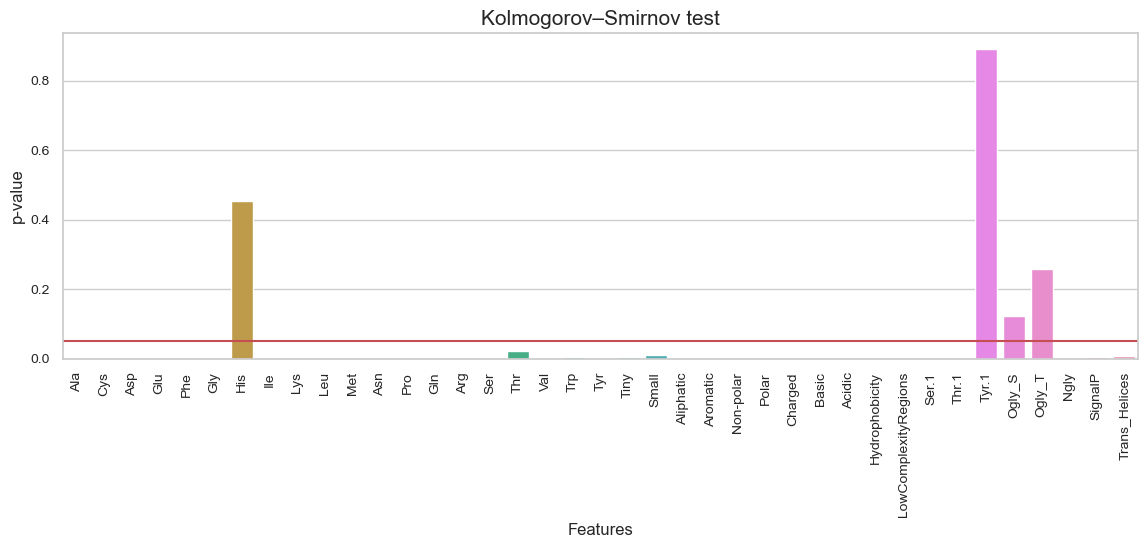

In [37]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.set(style="whitegrid", font_scale=2)
sns.barplot(data = pval_df, x = 'column', y = 'p-value')
plt.title('Kolmogorov–Smirnov test', fontsize=15)
plt.axhline(y=0.05, color='r', linestyle='-')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Features', fontsize=12)
plt.ylabel('p-value', fontsize=12)
plt.tight_layout()
plt.show()

